In [1]:
# Best Performance:
"""
>> t1 - b/w 30-70 - log: random new is best

>> plain:

Validation Metrics:
MAE: 5.36
MAPE: 3.456741751615032e+17
MSE: 88.86
RMSE: 9.43
R² Score: 0.42
Adjusted R² Score (Validation): 0.35

Test Metrics:
MAE: 5.82
MAPE: 4.0960967186566554e+17
MSE: 120.99
RMSE: 11.0
R² Score: 0.25
Adjusted R² Score (Test): 0.18

>> random old - 100:

Validation Metrics:
MAE: 5.29
MAPE: 2.9301237063471494e+17
MSE: 90.77
RMSE: 9.53
R² Score: 0.41
Adjusted R² Score: 0.34

Test Metrics:
MAE: 5.5
MAPE: 3.162845800604044e+17
MSE: 104.66
RMSE: 10.23
R² Score: 0.35
Adjusted R² Score: 0.35

>> random new - 100:

Validation Metrics:
MAE: 5.25
MAPE: 2.988661425487059e+17
MSE: 90.41
RMSE: 9.51
R² Score: 0.41
Adjusted R² Score: 0.34

Test Metrics:
MAE: 5.46
MAPE: 3.110974226356128e+17
MSE: 106.25
RMSE: 10.31
R² Score: 0.34
Adjusted R² Score: 0.36

>> coarse - 100:

Validation Metrics:
MAE: 5.29
MAPE: 2.96479314001982e+17
MSE: 90.55
RMSE: 9.52
R² Score: 0.41
Adjusted R² Score: 0.34

Test Metrics:
MAE: 5.55
MAPE: 3.182888834964687e+17
MSE: 107.43
RMSE: 10.37
R² Score: 0.33
Adjusted R² Score: 0.35


"""

'\n>> t1 - b/w 30-70 - log - Random Search:\n\nValidation Metrics:\nMAE: 5.29\nMAPE: 2.9301237063471494e+17\nMSE: 90.77\nRMSE: 9.53\nR² Score: 0.41\nAdjusted R² Score: 0.34\n\nTest Metrics:\nMAE: 5.5\nMAPE: 3.162845800604044e+17\nMSE: 104.66\nRMSE: 10.23\nR² Score: 0.35\nAdjusted R² Score: 0.35\n\n>> t1 - b/w 30-70 - log - plain:\n\nValidation Metrics:\nMAE: 5.36\nMAPE: 3.456741751615032e+17\nMSE: 88.86\nRMSE: 9.43\nR² Score: 0.42\nAdjusted R² Score (Validation): 0.35\n\nTest Metrics:\nMAE: 5.82\nMAPE: 4.0960967186566554e+17\nMSE: 120.99\nRMSE: 11.0\nR² Score: 0.25\nAdjusted R² Score (Test): 0.18\n\n'

In [2]:
import pandas as pd
import numpy as np
import joblib
import time
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [3]:
# unpickle - pandas dataframe
df = pd.read_pickle("df_5_final_t1.pkl")
df.shape

(3642, 65)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   groda_Höstvete         3642 non-null   float64
 1   sort_Barranco          3642 non-null   float64
 2   sort_Bright            3642 non-null   float64
 3   sort_Brons             3642 non-null   float64
 4   sort_Cubus             3642 non-null   float64
 5   sort_Ellvis            3642 non-null   float64
 6   sort_Etana             3642 non-null   float64
 7   sort_Fenomen           3642 non-null   float64
 8   sort_Frontal           3642 non-null   float64
 9   sort_Hallfreda         3642 non-null   float64
 10  sort_Hereford          3642 non-null   float64
 11  sort_Informer          3642 non-null   float64
 12  sort_Jonas             3642 non-null   float64
 13  sort_Julius            3642 non-null   float64
 14  sort_KWS_Kerrin        3642 non-null   float64
 15  sort

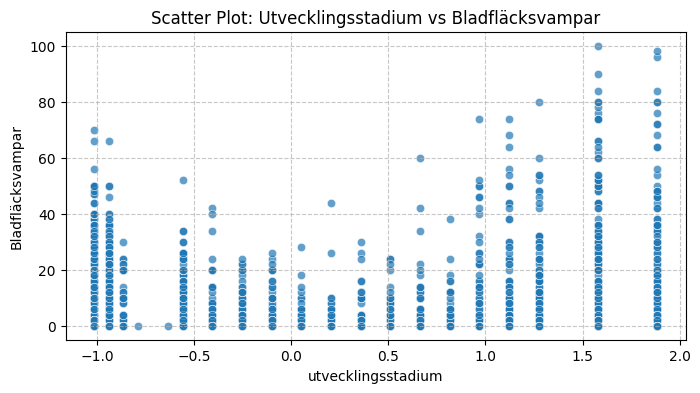

In [5]:
# Scatter plot using matplotlib:
#plt.figure(figsize=(8, 4))
#plt.scatter(df['utvecklingsstadium'], df['Bladfläcksvampar'], alpha=0.5)
#plt.xlabel('Utvecklingsstadium')
#plt.ylabel('Bladfläcksvampar')
#plt.title('Scatter Plot: Utvecklingsstadium vs Bladfläcksvampar')
#plt.grid(True, linestyle='--', alpha=0.7)
#plt.show()

# Scatter plot with seaborn
plt.figure(figsize=(8, 4))
sns.scatterplot(x='utvecklingsstadium', y='Bladfläcksvampar', data=df, alpha=0.7)
plt.title('Scatter Plot: Utvecklingsstadium vs Bladfläcksvampar')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Drop unwanted columns:
#df.drop(['delomrade', 'lan'], axis=1, inplace=True)
#df.shape

In [7]:
# Drop unwanted rows:
#df = df[df['Bladfläcksvampar'] >= 1]
#df.shape

In [8]:
X = df.drop(columns=['Bladfläcksvampar','WGS84N','WGS84E']) 
X.shape

(3642, 62)

In [9]:
y = df['Bladfläcksvampar']
y.shape

(3642,)

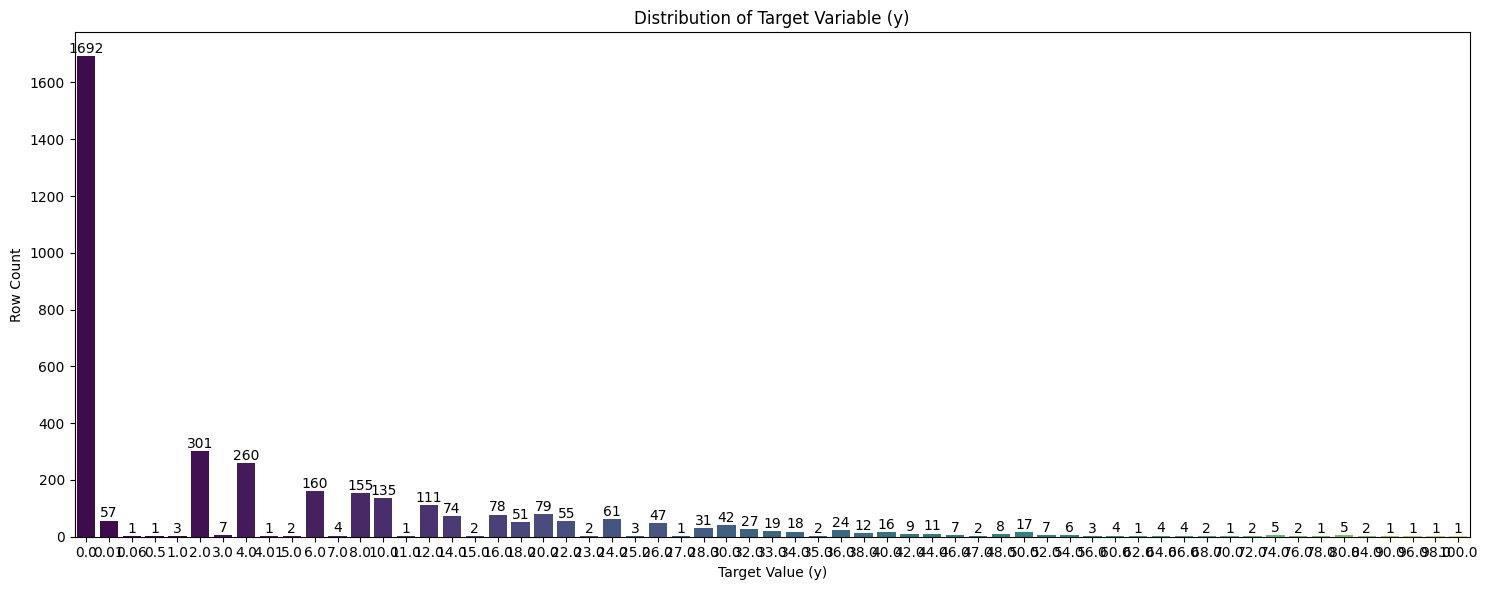

In [10]:
# Target Variable - Distribution Plot:

unique_values, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(15, 6))
sns.barplot(x=unique_values, y=counts, hue=unique_values, palette='viridis', legend=False, dodge=False)

plt.xlabel('Target Value (y)')
plt.ylabel('Row Count')
plt.title('Distribution of Target Variable (y)')

# Add the count numbers on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

#plt.grid(True)
plt.tight_layout()
plt.show()

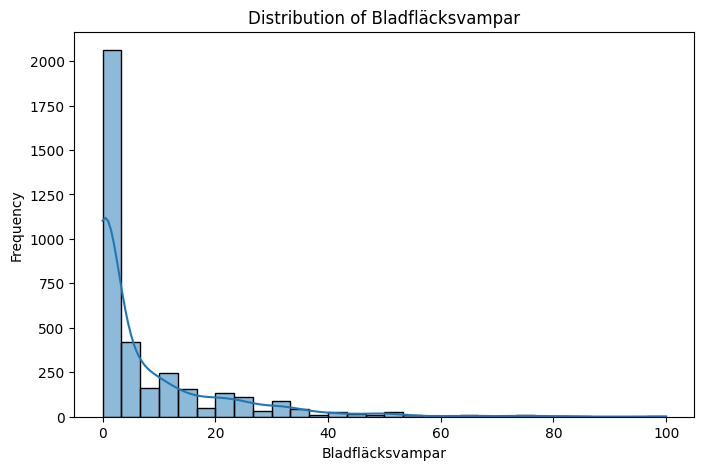

Skewness: 2.589841582105244
Kurtosis: 8.603888440683063


In [11]:
# Histogram of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True)
plt.xlabel("Bladfläcksvampar")
plt.ylabel("Frequency")
plt.title("Distribution of Bladfläcksvampar")
plt.show()

# Check skewness and kurtosis
from scipy.stats import skew, kurtosis

print(f"Skewness: {skew(y)}")
print(f"Kurtosis: {kurtosis(y)}")

In [12]:
#  Transformations - scaling to reduce data skew:
log_trans = 'yes'
if log_trans == 'yes':
    y = np.log1p(y)  # Lograthimic Transformation - high skew - best for this
    #y = np.sqrt(y)  # Square Root Transformation - medium skew
    #y = np.power(y)  # Cube Root Transformation 

print(y.describe())

count    3642.000000
mean        1.236099
std         1.345564
min         0.000000
25%         0.000000
50%         1.098612
75%         2.397895
max         4.615121
Name: Bladfläcksvampar, dtype: float64


In [13]:
# Handle NaN and infinite values in y after log:

#print("NaN values in y:", np.isnan(y).sum())
#print("Infinity values in y:", np.isinf(y).sum())
#y.fillna(y.median(), inplace=True)  # Replace NaNs with median value
#y = y.replace([np.inf, -np.inf], y.median()) # Replace Infinite with median value

# Check for NaN and infinite values in y
nan_count = np.isnan(y).sum()
inf_count = np.isinf(y).sum()

print("NaN values in y:", nan_count)
print("Infinity values in y:", inf_count)

# Replace NaN and infinite values with median
if nan_count > 0 or inf_count > 0:
    median_value = y.median()
    y.fillna(median_value, inplace=True)  # Replace NaNs
    y = y.replace([np.inf, -np.inf], median_value)  # Replace Infinite values

    print(f"Replaced {nan_count + inf_count} values with median: {median_value}")

# Display the number of affected rows
affected_rows = (nan_count + inf_count)
print("Number of rows affected:", affected_rows)


NaN values in y: 0
Infinity values in y: 0
Number of rows affected: 0


In [14]:
y

0       1.386294
1       1.386294
2       0.693147
3       0.000000
4       1.386294
          ...   
3637    1.945910
3638    1.098612
3639    0.000000
3640    1.945910
3641    0.009950
Name: Bladfläcksvampar, Length: 3642, dtype: float64

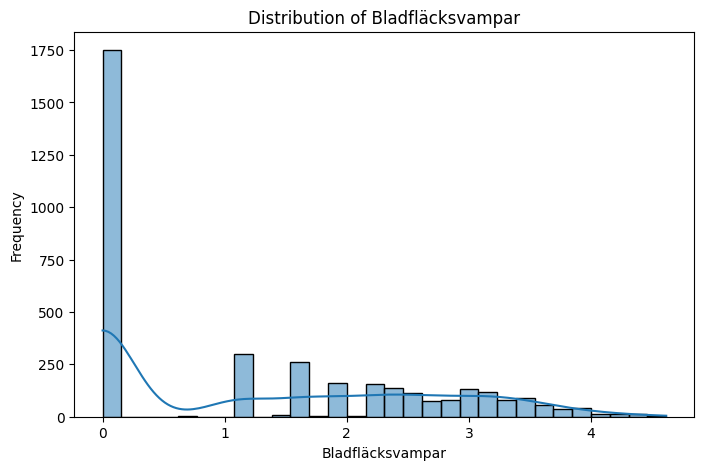

Skewness: 0.5226437474416465
Kurtosis: -1.1876782021076064


In [15]:
# Histogram of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True)
plt.xlabel("Bladfläcksvampar")
plt.ylabel("Frequency")
plt.title("Distribution of Bladfläcksvampar")
plt.show()

# Check skewness and kurtosis
from scipy.stats import skew, kurtosis

print(f"Skewness: {skew(y)}")
print(f"Kurtosis: {kurtosis(y)}")

In [16]:
# Split train, test and validation data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) 

In [17]:
# Model:

# Start the timer
t0 = time.time()

# Define the base model with default hyperparameters
xgb = XGBRegressor(random_state=1)

# Fit the training data to the model
xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Specify training and validation sets
    verbose=10  # Print progress every 10 iterations
)

# Stop the timer
t1 = time.time()
print("Seconds Taken:", t1 - t0)

[0]	validation_0-rmse:1.19617	validation_1-rmse:1.22345
[10]	validation_0-rmse:0.85119	validation_1-rmse:1.02221
[20]	validation_0-rmse:0.77818	validation_1-rmse:1.00432
[30]	validation_0-rmse:0.73678	validation_1-rmse:1.00292
[40]	validation_0-rmse:0.69415	validation_1-rmse:1.01325
[50]	validation_0-rmse:0.65903	validation_1-rmse:1.02403
[60]	validation_0-rmse:0.62702	validation_1-rmse:1.03706
[70]	validation_0-rmse:0.60856	validation_1-rmse:1.03901
[80]	validation_0-rmse:0.58878	validation_1-rmse:1.04278
[90]	validation_0-rmse:0.57221	validation_1-rmse:1.04525
[99]	validation_0-rmse:0.55481	validation_1-rmse:1.04893
Seconds Taken: 0.22658467292785645


In [18]:
# Access the evaluation results
eval_result = xgb.evals_result()

# Extract the number of training rounds
training_rounds = range(len(eval_result['validation_0']['rmse']))  # Training rounds

# Print the training rounds
print(training_rounds)

range(0, 100)


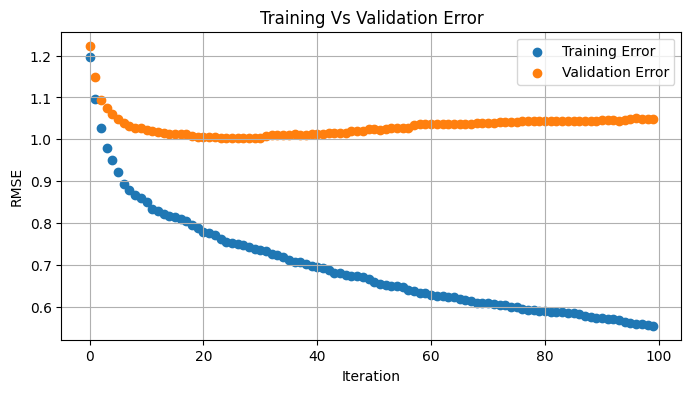

In [19]:
# Plot the training and validation errors
plt.figure(figsize=(8, 4))
plt.scatter(x=training_rounds, y=eval_result['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds, y=eval_result['validation_1']['rmse'], label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [20]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a function to calculate MAPE
def mean_absolute_percentage_error_custom(y_true, y_pred):
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Replace zeros with a small number
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate on validation set
y_val_pred = xgb.predict(X_val)

# Inverse Transformation:
if log_trans == 'yes':  # Ensure log_trans is defined (e.g., log_trans = 'yes' or 'no')
    y_val = np.expm1(y_val)
    y_val_pred = np.expm1(y_val_pred)

print("\nValidation Metrics:")
print("MAE:", round(mean_absolute_error(y_val, y_val_pred), 2))
print("MAPE:", round(mean_absolute_percentage_error_custom(y_val, y_val_pred), 2))  # Use custom MAPE
print("MSE:", round(mean_squared_error(y_val, y_val_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 2))
print("R² Score:", round(r2_score(y_val, y_val_pred), 2))

# Calculate adjusted R² score for validation set
r2_val = r2_score(y_val, y_val_pred)
n_val = len(y_val)  # Number of observations
p_val = X_val.shape[1]  # Number of predictors (features)
adjusted_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p_val - 1)
print("Adjusted R² Score (Validation):", round(adjusted_r2_val, 2))

# Evaluate on test set
y_test_pred = xgb.predict(X_test)

# Inverse Transformation:
if log_trans == 'yes':
    y_test = np.expm1(y_test)
    y_test_pred = np.expm1(y_test_pred)

print("\nTest Metrics:")
print("MAE:", round(mean_absolute_error(y_test, y_test_pred), 2))
print("MAPE:", round(mean_absolute_percentage_error_custom(y_test, y_test_pred), 2))  # Use custom MAPE
print("MSE:", round(mean_squared_error(y_test, y_test_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2))
print("R² Score:", round(r2_score(y_test, y_test_pred), 2))

# Calculate adjusted R² score for test set
r2_test = r2_score(y_test, y_test_pred)
n_test = len(y_test)  # Number of observations
p_test = X_test.shape[1]  # Number of predictors (features)
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)
print("Adjusted R² Score (Test):", round(adjusted_r2_test, 2))


Validation Metrics:
MAE: 5.36
MAPE: 3.456741751615032e+17
MSE: 88.86
RMSE: 9.43
R² Score: 0.42
Adjusted R² Score (Validation): 0.35

Test Metrics:
MAE: 5.82
MAPE: 4.0960967186566554e+17
MSE: 120.99
RMSE: 11.0
R² Score: 0.25
Adjusted R² Score (Test): 0.18


In [21]:
# Validation - Check for min, max, NaN, infinite values
print("\nMin y_val:", np.min(y_val), "Max y_val:", np.max(y_val))
print("Min y_val_pred:", np.min(y_val_pred), "Max y_val_pred:", np.max(y_val_pred))
print("NaN in y_val:", np.isnan(y_val).sum(), "NaN in y_val_pred:", np.isnan(y_val_pred).sum())
print("Inf in y_val:", np.isinf(y_val).sum(), "Inf in y_val_pred:", np.isinf(y_val_pred).sum())

# Test - Check for min, max, NaN, infinite values
print("\nMin y_test:", np.min(y_test), "Max y_test:", np.max(y_test))
print("Min y_test_pred:", np.min(y_test_pred), "Max y_test_pred:", np.max(y_test_pred))
print("NaN in y_test:", np.isnan(y_test).sum(), "NaN in y_test_pred:", np.isnan(y_test_pred).sum())
print("Inf in y_test:", np.isinf(y_test).sum(), "Inf in y_test_pred:", np.isinf(y_test_pred).sum())


Min y_val: 0.0 Max y_val: 96.0
Min y_val_pred: -0.4059001 Max y_val_pred: 94.15809
NaN in y_val: 0 NaN in y_val_pred: 0
Inf in y_val: 0 Inf in y_val_pred: 0

Min y_test: 0.0 Max y_test: 80.00000000000003
Min y_test_pred: -0.45001534 Max y_test_pred: 93.2452
NaN in y_test: 0 NaN in y_test_pred: 0
Inf in y_test: 0 Inf in y_test_pred: 0


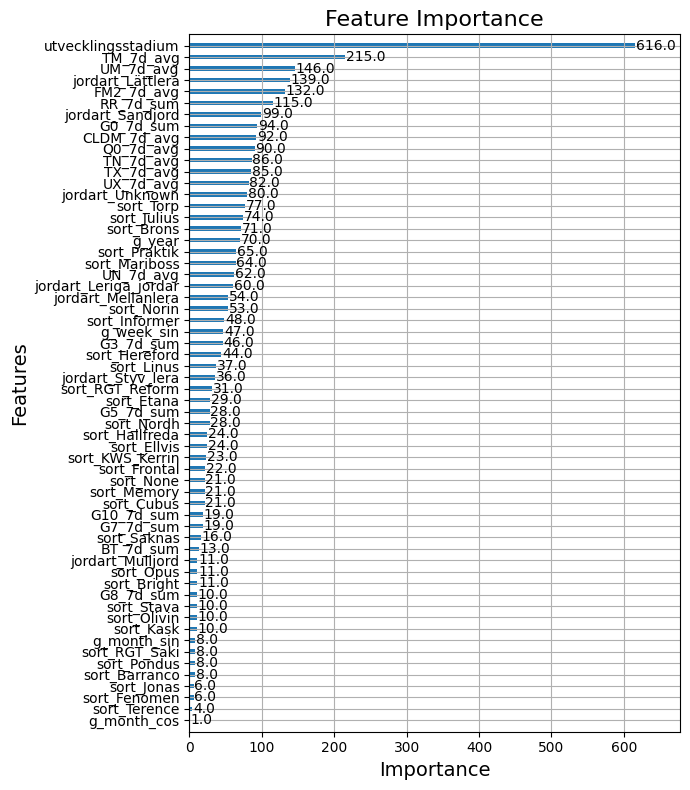

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 8))  # Set the figure size explicitly here

# Plot feature importance
plot_importance(
    xgb,  # Use the plain XGBRegressor model
    importance_type='weight',  # Type of importance (options: 'weight', 'gain', 'cover')
    max_num_features=None,  # Show all features
    height=0.4,  # Height of each bar
    ax=ax  # Axis to plot on
)

# Add titles and labels
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

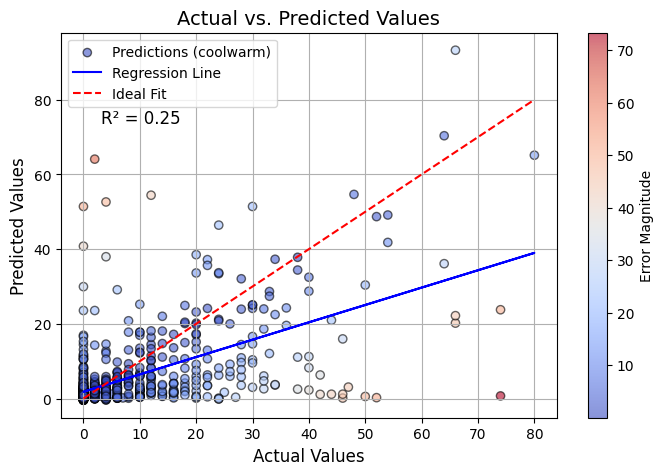

In [23]:
from sklearn.linear_model import LinearRegression

# Ensure y_test and y_test_pred are NumPy arrays
y_test = np.array(y_test)
y_test_pred = np.array(y_test_pred)

# Scatter Plot (Actual vs. Predicted Values)
plt.figure(figsize=(8, 5))

# Compute errors and color points by error magnitude
errors = abs(y_test - y_test_pred)

# Scatter plot with color based on error
#plt.scatter(y_test, y_test_pred, c=errors, cmap='coolwarm', alpha=0.6, edgecolors='k', label="Predictions (coolwarm)")
scatter = plt.scatter(y_test, y_test_pred, c=errors, cmap='coolwarm', alpha=0.6, edgecolors='k', label="Predictions (coolwarm)")

# Fit a linear regression model to draw a regression line
model = LinearRegression()
model.fit(y_test.reshape(-1, 1), y_test_pred)
plt.plot(y_test, model.predict(y_test.reshape(-1, 1)), color='blue', linestyle='-', label='Regression Line')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")  # Add Ideal Fit Line
plt.text(0.08, 0.80, f'R² = {r2_test:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')  # Display R² value on the plot:

plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs. Predicted Values", fontsize=14)
cbar = plt.colorbar(scatter, label='Error Magnitude')  # Add a color bar to show error scale
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

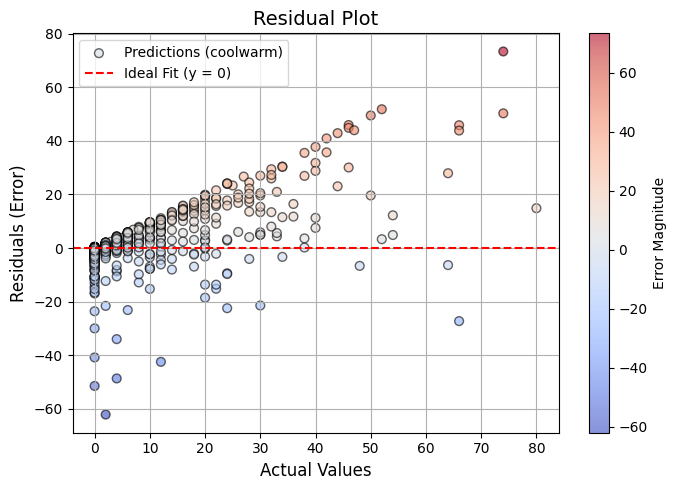

In [24]:
import matplotlib.pyplot as plt

# Residuals Calculation
residuals = y_test - y_test_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_test, residuals, alpha=0.6, edgecolors='k', c=residuals, cmap='coolwarm', label="Predictions (coolwarm)", s=40)
plt.axhline(0, color='red', linestyle='--', label="Ideal Fit (y = 0)") # Add the red horizontal line at 0 for Ideal Fit

plt.title("Residual Plot", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Residuals (Error)", fontsize=12)
plt.colorbar(label='Error Magnitude')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

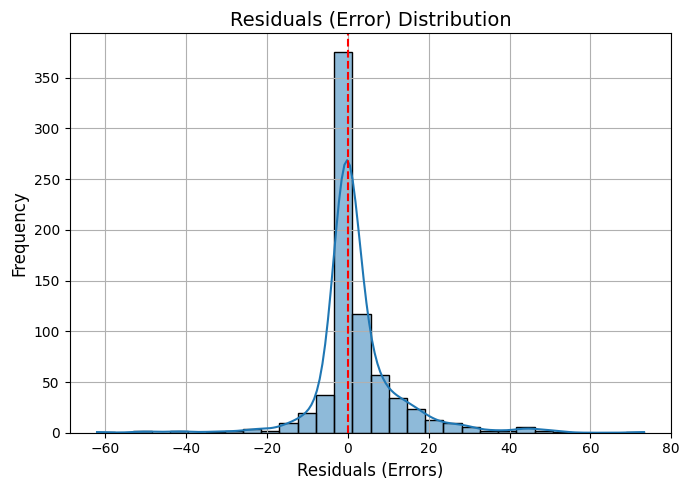

In [25]:
# Histogram of Residuals (Error Distribution):

#residuals = y_test - y_test_pred

plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')

plt.title("Residuals (Error) Distribution", fontsize=14)
plt.xlabel("Residuals (Errors)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation:
# If the distribution is bell-shaped and centered at zero, errors are normally distributed, meaning the model is unbiased.
# If it's skewed (more errors on one side), the model systematically under- or over-predicts.
# If it’s wide, the model has high variance.

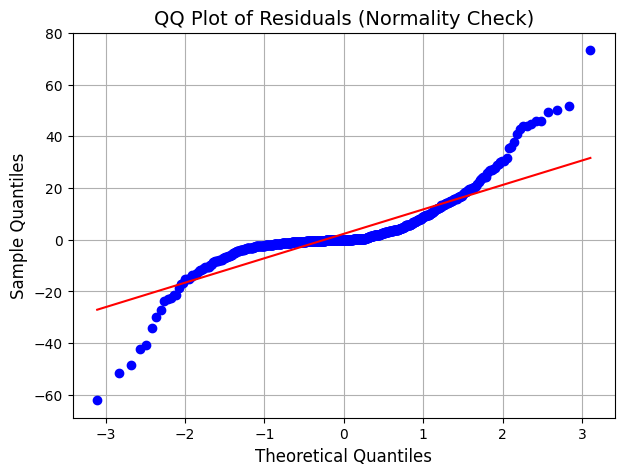

In [26]:
# QQ Plot (Normality Check for Residuals):

#residuals = y_test - y_test_pred

plt.figure(figsize=(7, 5))

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals (Normality Check)", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True)
plt.show()

# Interpretation:
# Straight Line → Errors are normally distributed (good).
# Curved S-shape → Errors are skewed, indicating systematic bias.
# Heavy tails (points deviating at ends) → Model struggles with extreme values.

In [27]:
# List top residuals:

#residuals = y_test - y_test_pred

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Index': np.arange(len(y_test)),  # Original indices
    'y_test': y_test,
    'y_test_pred': y_test_pred,
    'Residuals': residuals
})

# Sort by absolute residuals in descending order
results_sorted = results.iloc[(-results['Residuals'].abs()).argsort()]

# Get the top 10 rows with the highest residuals
top_10_residuals = results_sorted.head(10)

# Display the results
print(top_10_residuals)

     Index  y_test  y_test_pred  Residuals
455    455    74.0     0.705633  73.294367
533    533     2.0    64.090210 -62.090210
400    400    52.0     0.239147  51.760853
173    173     0.0    51.419285 -51.419285
385    385    74.0    23.771639  50.228361
491    491    50.0     0.557729  49.442271
16      16     4.0    52.625206 -48.625206
465    465    46.0     0.126536  45.873464
46      46    66.0    20.193832  45.806168
489    489    46.0     1.169154  44.830846


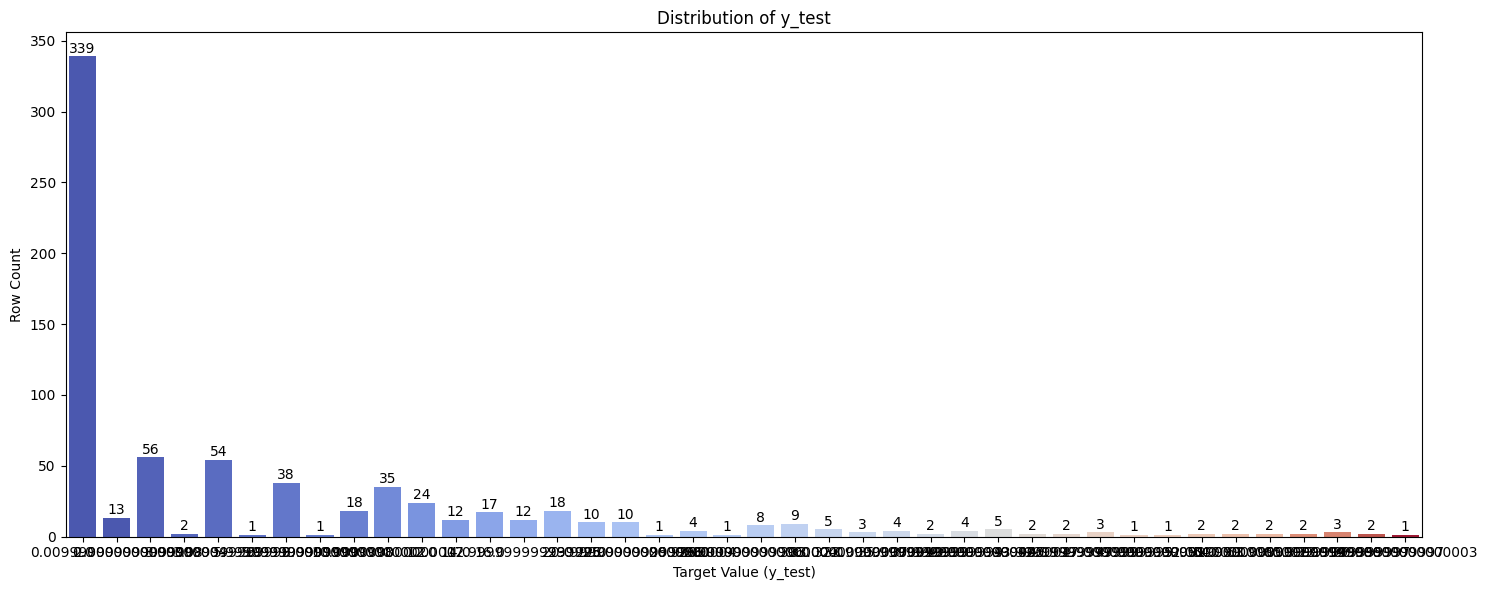

In [28]:
# y_test - Distribution Plot:

unique_values, counts = np.unique(y_test, return_counts=True)

plt.figure(figsize=(15, 6))
sns.barplot(x=unique_values, y=counts, hue=unique_values, palette='coolwarm', legend=False, dodge=False)

plt.xlabel('Target Value (y_test)')
plt.ylabel('Row Count')
plt.title('Distribution of y_test')

# Add the count numbers on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

#plt.grid(True)
plt.tight_layout()
plt.show()

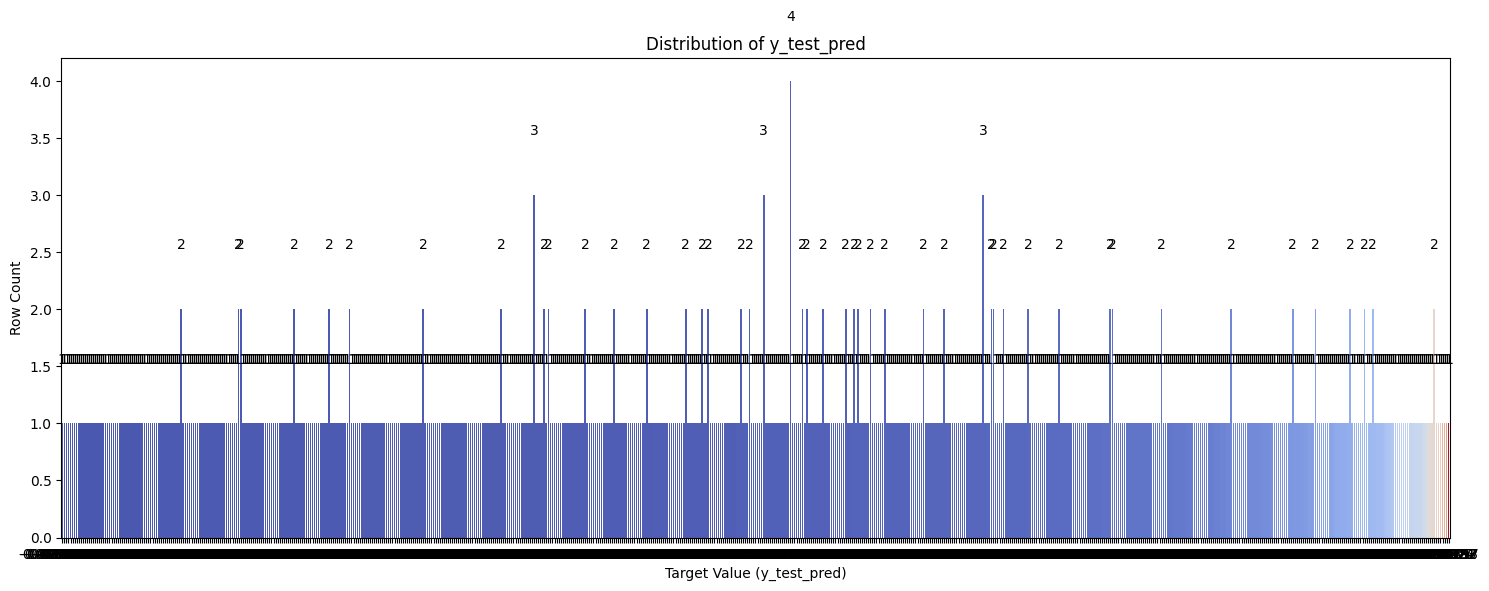

In [29]:
# y_test_pred - Distribution Plot:

unique_values, counts = np.unique(y_test_pred, return_counts=True)

plt.figure(figsize=(15, 6))
sns.barplot(x=unique_values, y=counts, hue=unique_values, palette='coolwarm', legend=False, dodge=False)

plt.xlabel('Target Value (y_test_pred)')
plt.ylabel('Row Count')
plt.title('Distribution of y_test_pred')

# Add the count numbers on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

#plt.grid(True)
plt.tight_layout()
plt.show()

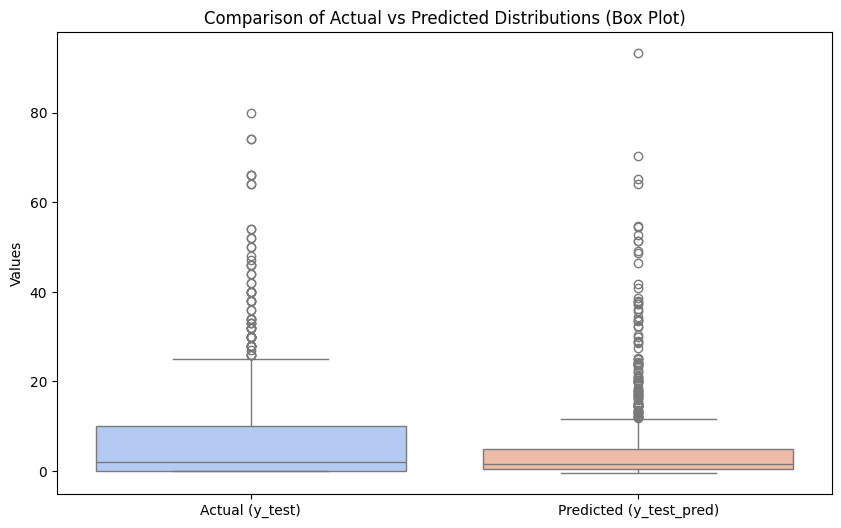

In [30]:
# Box Plot:

plt.figure(figsize=(10, 6))
sns.boxplot(data=[y_test, y_test_pred], palette='coolwarm')

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Actual (y_test)', 'Predicted (y_test_pred)'])
plt.ylabel('Values')
plt.title('Comparison of Actual vs Predicted Distributions (Box Plot)')
plt.show()

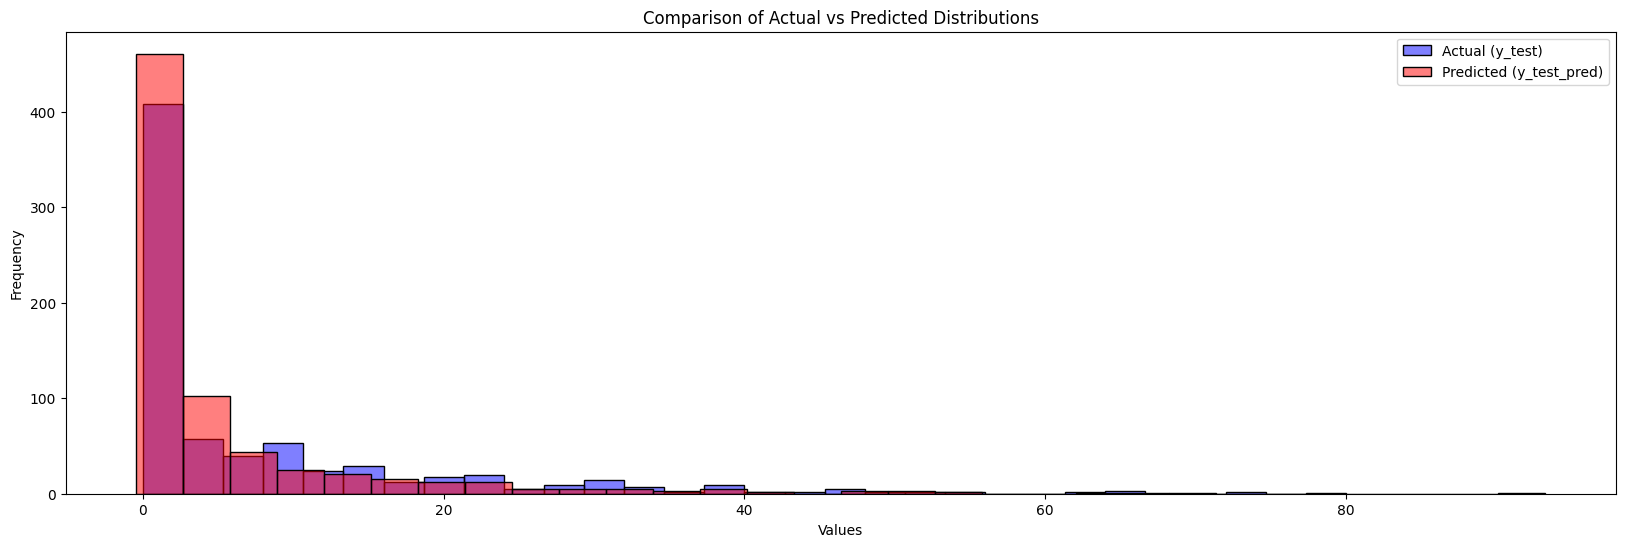

In [31]:
# Histogram - y_test vs y_test_pred distribution:

plt.figure(figsize=(20, 6))
sns.histplot(y_test, color='blue', label='Actual (y_test)', kde=False, bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='red', label='Predicted (y_test_pred)', kde=False, bins=30, alpha=0.5)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Comparison of Actual vs Predicted Distributions')
plt.legend()
plt.show()

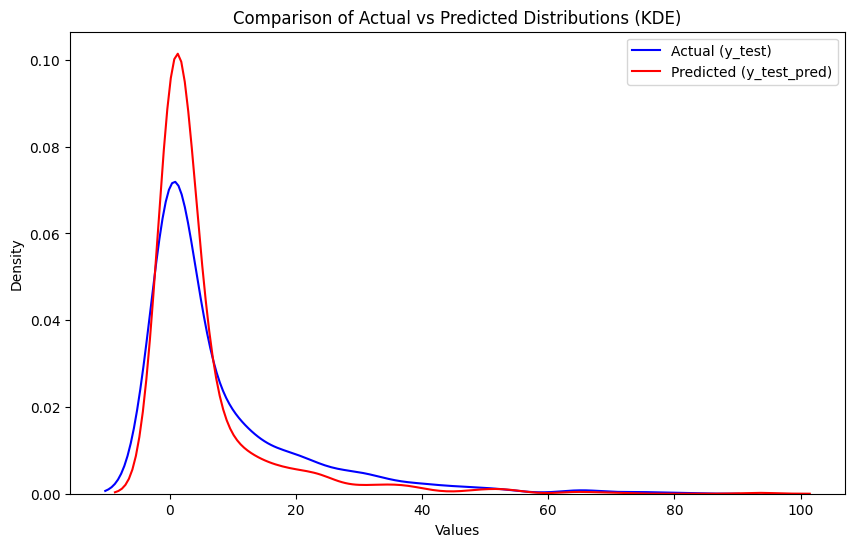

In [32]:
# KDE (Kernal Density Estimate) Plot - y_test vs y_test_pred distribution:

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='blue', label='Actual (y_test)')
sns.kdeplot(y_test_pred, color='red', label='Predicted (y_test_pred)')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Comparison of Actual vs Predicted Distributions (KDE)')
plt.legend()
plt.show()

In [ ]:
# SHAP Values:

# activate javascript, load javascript library when visualization is not showing
shap.initjs()

# explain all the predictions in the test set
t0 = time.time()
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X)
t1 = time.time()
print(t1-t0, " sec taken")

In [ ]:
shap.summary_plot(shap_values, X, feature_names=selected_columns, max_display=10) #plot_type="bar" for bar type 

In [ ]:
shap.dependence_plot("FM2_7d_avg", shap_values, X, feature_names=selected_columns, show=False) # interaction_index=None
plt.title("Relationship of temperature and feeling temperature");

In [ ]:
"""
# SHAP Interaction Values:

t0 = time.time()
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X, feature_names=selected_columns)
t1 = time.time()
print(t1-t0, " sec taken")
"""

In [ ]:
# Features interaction summary plot - plot type "compact dot":
#shap.summary_plot(shap_interaction_values, X, feature_names=selected_columns, plot_type="compact_dot")  # Use X-originals

In [ ]:
#shap.dependence_plot(("FM2_7d_avg", "utvecklingsstadium"),shap_interaction_values, X)  # Use X-originals